In [2]:
# 225 군집(비슷한 데이터 끼리 묶어줌)
# 분류, 이상치 검출
# k-평균 군집
# 병합 군집
# DBSCAN(Density based spatial clustering Application Noise) 밀도가 높은 공간

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn

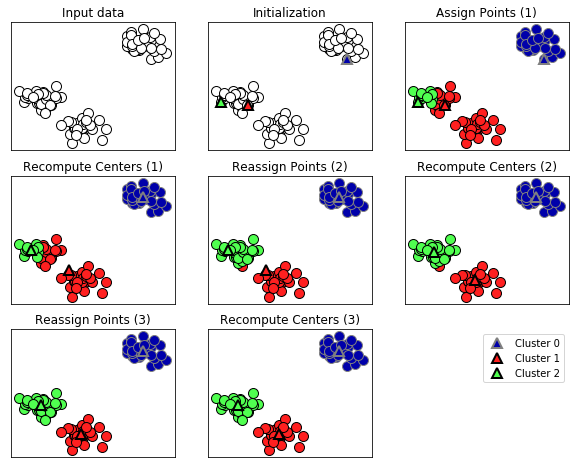

In [7]:
mglearn.plots.plot_kmeans_algorithm()

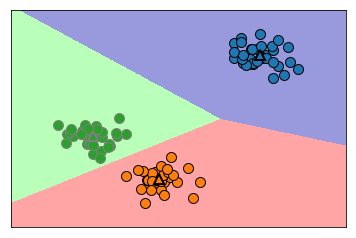

In [16]:
mglearn.plots.plot_kmeans_boundaries()

In [23]:
from sklearn.datasets import make_blobs
x, y = make_blobs() #연습용 데이터셋
x.shape, y.shape

((100, 2), (100,))

In [27]:
from sklearn.cluster import KMeans

In [33]:
km = KMeans(n_clusters=3).fit(x) # 3개로  나눠조

In [34]:
km.predict(x) # x가 몇번째 그룹이니?

array([0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0,
       0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 2,
       1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 0, 0, 0,
       0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2])

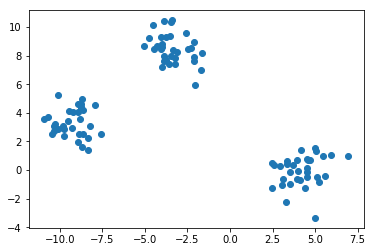

In [35]:
plt.scatter(x[:,0],x[:,1])

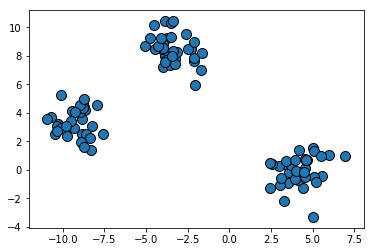

In [37]:
l = mglearn.discrete_scatter(x[:,0], x[:,1]), km.predict((x))

duguts  적용해보가
- tNE 2개의 차원으로 축소한다.
- 그 데이터로 k-Means fit함. k=10
- k-Means의 예측을 산점도에서 표시함

In [48]:
from sklearn.manifold import TSNE
digits_tsne =TSNE().fit_transform(digits_data)

NameError: name 'digits_data' is not defined

한국 프로야구 10개팀 클러스터링

In [52]:
import pandas as pd
url = 'KBReport _ 한국 프로야구 통계 사이트.html'
tables = pd.read_html(url)
len(tables)

7

In [54]:
for t in tables:
    print(t.shape)

(10, 10)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)


In [69]:
baseball = tables[0]
baseball

,순위,팀명,승,무,패,승률,게임차,득점,실점,연속
0,1,SK,59,1,29,0.670,0.0,441,342,2패
1,2,두산,54,0,36,0.600,6.0,440,346,2승
2,3,Hero,54,0,37,0.593,6.5,500,387,4승
3,4,LG,49,1,38,0.563,9.5,377,377,1패
4,5,NC,42,1,44,0.488,16.0,409,415,2패
5,6,KT,42,1,47,0.472,17.5,407,456,1패
6,7,삼성,37,1,49,0.430,21.0,400,424,2승
7,8,KIA,36,1,52,0.409,23.0,401,467,2패
8,9,한화,34,0,53,0.391,24.5,388,449,1승
9,10,롯데,32,2,54,0.372,26.0,407,507,1승


In [70]:
# baseball.set_index('팀명', inplace=True) #return 없이 자체적으로 바꾸기, 1번만 실행
base = baseball.set_index('팀명')

In [71]:
data = base.drop(columns='연속')

In [73]:
data.shape

(10, 8)

In [84]:
# 2차원으로 변환한 후 k개로 클러스터링
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit(data)
data_pca = pca.transform(data)
data_pca.shape
data_pca


array([[-82.63008057,  -6.26201171,  -5.34254181],
       [-76.0355584 ,  -5.68865172,   3.70827197],
       [-61.14104127,  65.40622928,   1.21206681],
       [-23.55138709, -52.17586524,  -4.02545529],
       [  1.57645744,  -8.19581479,   1.24208583],
       [ 39.6385485 ,   5.61816139,  -6.01603128],
       [ 15.20972192, -13.12994716,   6.73654862],
       [ 54.18601309,   4.19859093,   0.15938587],
       [ 43.57464041, -14.7038801 ,   5.74952713],
       [ 89.17268597,  24.93318911,  -3.42385784]])

In [88]:
# k means 로 클러스터링
km = KMeans(n_clusters=3).fit(data_pca)
km
group = km.predict(data_pca)

In [89]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

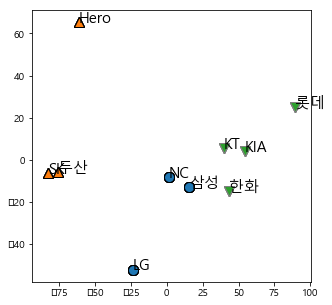

In [93]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(5,5))
plt.xlim(data_pca[:,0].min(),data_pca[:,0].max()+1)
plt.ylim(data_pca[:,1].min(),data_pca[:,1].max()+1)
for i in range(len(data_pca)):
    plt.text(data_pca[i,0], data_pca[i,1], data.index[i], fontdict={'size':15})
    l =mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], group)
#plt.scatter(data_pca[i,0], data_pca[i,1])

머신러닝 저장소 - 3위 와인 데이터
와인의 질, 컬러, 알콜 도수 등을 측정 -> 원산지(3군데)를 추정하는 문제

In [97]:
wine = pd.read_csv('wine.data', header=None)

In [99]:
y = wine[0]
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [108]:
x = wine.iloc[:, 1:]
pca = PCA(n_components=2).fit(x)
wine_pca = pca.transform(x)
km = KMeans(n_clusters=3).fit(wine_pca)
group = km.predict(wine_pca)

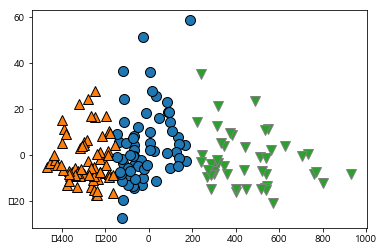

In [111]:
l = mglearn.discrete_scatter(wine_pca[:,0], wine_pca[:,1], group)

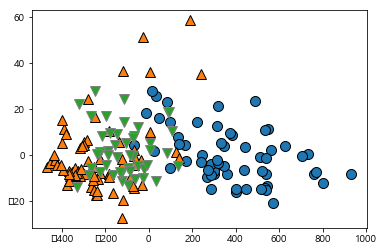

In [112]:

l = mglearn.discrete_scatter(wine_pca[:,0], wine_pca[:,1], wine.iloc[:,0])

In [116]:
loans = pd.read_csv('loans.csv')
loans.shape

(9578, 14)

In [117]:
loans.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths       float64
delinq.2yrs          float64
pub.rec              float64
not.fully.paid         int64
dtype: object

### 대출 상환 여부
1. get_dummy() 로 purpose 원핫 인코딩
2. PCA로 2차원으로 축소
3. K-Means(2개)로 그룹화
4. 산점도로 출력

In [119]:
loans = loans.dropna()
loans_hot = pd.get_dummies(loans)

In [121]:
x_pca = PCA(n_components=2).fit(loans_hot).transform(loans_hot) # n_components=2 대출 갚냐 안갚냐 2가지
km = KMeans(n_clusters=2).fit(x_pca) #2개로 그룹화
group = km.predict(x_pca)


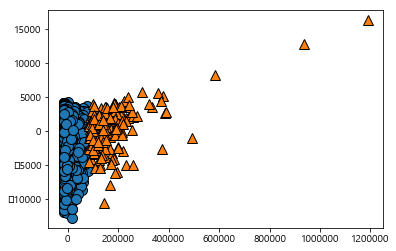

In [123]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], group) # 예측

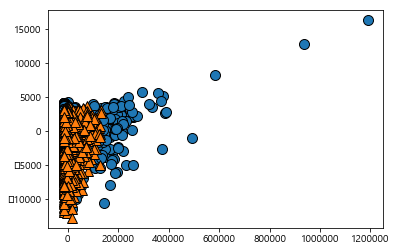

In [125]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], loans.iloc[:,0]) #실제로 돈 안갚는 사람